## 日立埋め込み論文
### 奥山ほか、イジング計算機に向けたグラフ埋め込みアルゴリズム、信学技法 COMP2016-11

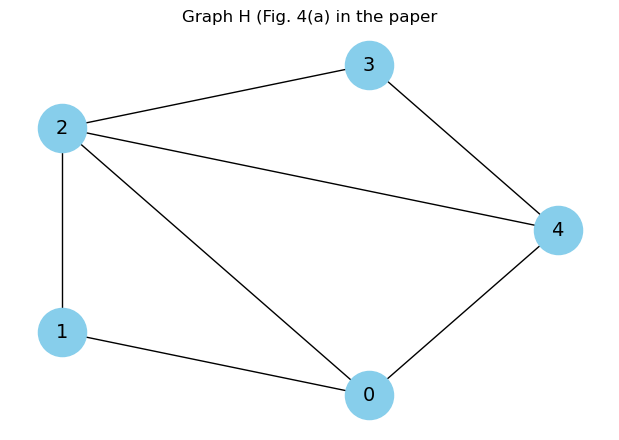

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 論文の図4(a)のグラフ

H = nx.Graph()  # 無向グラフ (Undirected Graph)

# ノードの追加
H.add_nodes_from([0, 1, 2, 3, 4])

# エッジの追加
H.add_edges_from([(0,1), (0,2), (0,4), (1,2), (2,3), (2,4), (3,4)])

###############################################################
# PyGraphvizのcircoレイアウトを使用してノードの位置を計算
pos = nx.drawing.nx_agraph.graphviz_layout(H, prog='circo')

# グラフの描画
plt.figure(figsize=(6, 4))
nx.draw(H, pos, with_labels=True, node_size=1200, node_color='skyblue', font_size=14, font_color='black')
plt.title('Graph H (Fig. 4(a) in the paper')        
plt.show()

## キンググラフの作成
### 属性の追加
一般にグラフのノードは「位置情報」のみを持っている。
埋め込みを実現するために val 属性を追加する。val は元のグラフ（グラフH）のノード番号。

### 初期値
第 0 行目：グラフHのノード番号

第 1 行目以降

- $x+y$ が偶数の場合
$(x-1, \max(0, y-1)$ の val 値
- $x+y$ が奇数の場合
$(x-1, \min(n-1, y+1)$ の val 値

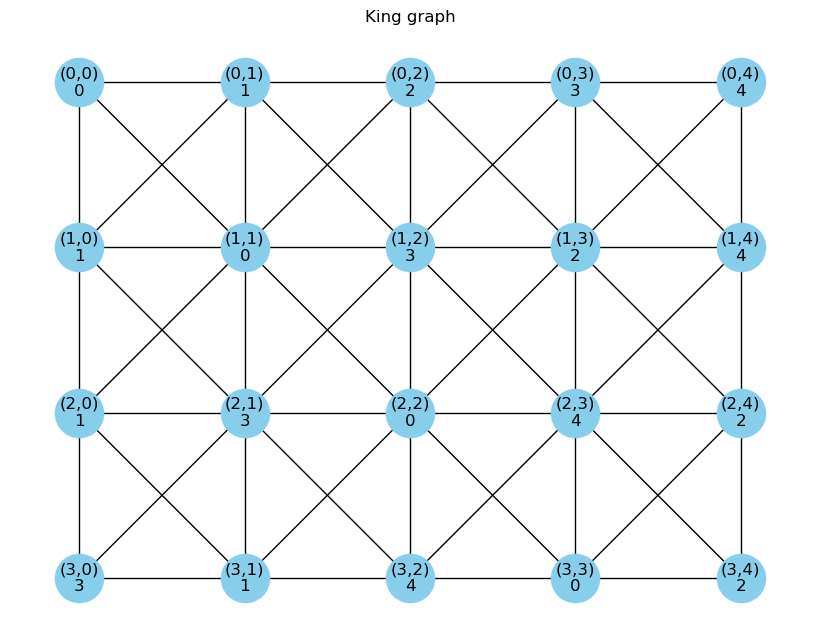

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

n = H.number_of_nodes()   # グラフHのノード数
H_nodes = list(H.nodes()) # グラフHのノードリスト

####################
# キンググラフGの作成
G = nx.grid_2d_graph(n-1, n)  # n-1 x n の格子グラフを作成

# 斜め方向のエッジを追加
for x, y in G.nodes():
    if (x+1, y+1) in G.nodes():
        G.add_edge((x, y), (x+1, y+1))
    if (x+1, y-1) in G.nodes():
        G.add_edge((x, y), (x+1, y-1))

####################
# グラフGにval属性を追加し、グラフHのノードの値を格納
for x, y in G.nodes():
    if x == 0: # 第0行の場合
        G.nodes[(x, y)]['val'] = H_nodes[y]
    else:
        # x+yが偶数の場合
        if (x + y) % 2 == 0:
            G.nodes[(x,y)]['val'] = G.nodes[(x-1, max(0, y-1))]['val']
        # x+yが奇数の場合
        else:
            G.nodes[(x,y)]['val'] = G.nodes[(x-1, min(n-1,y+1))]['val']

####################
# 格子状レイアウトでグラフを描画
def Show_KingGraph(K):
    # yを横、-xを縦にすることで正しい表現（行, 列）になる
    pos = {(x, y): (y, -x) for x, y in K.nodes()}

    # ノードラベルを設定
    # labels = {(x, y): f"({x},{y})" for x, y in G.nodes()}
    labels = {(x, y): f"({x},{y})\n{G.nodes[(x, y)]['val']}" for x, y in G.nodes()}

    plt.figure(figsize=(8, 6))
    nx.draw(K, pos, labels=labels, with_labels=True, node_size=1200, node_color='skyblue', font_size=12, font_color='black')
    plt.title('King graph')
    plt.show()
    
Show_KingGraph(G)

0 :

1 :
(0, 1) (1, 0) (2, 0) (3, 1) 
2 :
(0, 2) (1, 3) (2, 4) (3, 4) 
3 :
(1, 2) (0, 3) (2, 1) (3, 0) 
4 :
(2, 3) (3, 2) (0, 4) (1, 4) 


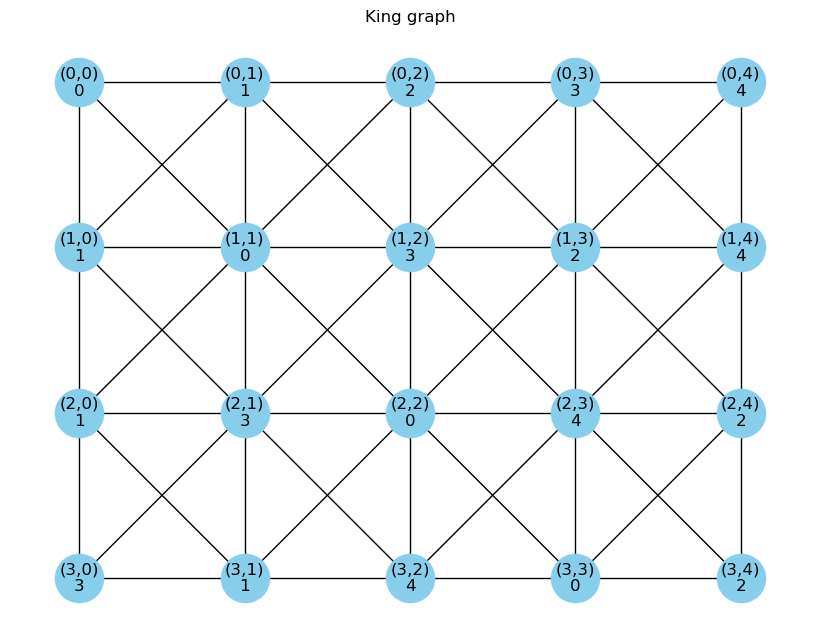

In [3]:
###############################################################
# グラフGのノードを val 値に基づき分類
val_grp = defaultdict(set)
for node in G.nodes():
    val = G.nodes[node]['val']
    val_grp[val].add(node)

# for Hnode in H_nodes: # 5行目
# 以下の行のインデントを修正する必要あり
Hnode = 0
val_grp[Hnode] = set()

for Hnode in H_nodes: # 5行目
    print(Hnode, ":")
    for node in val_grp[Hnode]: # 6行目
        print(node, end=' ')
    print()

# for node in val_grp[Hnode]: # 6行目
#     print(node, end=' ')
#     G.nodes[node]['val'] = ' '

Show_KingGraph(G)
# neighbors = list(G.neighbors(gnode))
# for nb in neighbors:
#     print(nb)

# labels = {(x, y): f"({x},{y})\n{K.nodes[(x, y)]['value']}" for x, y in K.nodes()}
# Show_KingGraph(K, pos, labels)

